# Part 3: Data Analytics

## Step 1: Select a real-world dataset

For this part of the coursework, it was my job to find a dataset that contained at least 5 columns and 150 rows on a subject of my choice. Due to the effect of the pandemic on the mental health of societies worldwide, I felt that it would be interesting to investigate the world happiness index of 2020. In this research project, I am going to analyse and test some hypotheses that I have about the data that I have found. 

I found my dataset on Kaggle, url = https://www.kaggle.com/mathurinache/world-happiness-report.

This data set comprises of 20 columns and 153 rows. There are two columns, 'Country Name' and 'Regional Indicator' whose content comprise of strings (nominal data) and the rest of the columns comprise of numerical data. The csv file is ordered as a rank from the country with the highest happiness index to the country with the lowest.  A proportion of the columns give numerical values that represent a part of society that contributes to making it happy or sad. Examples include 'logged GDP per capita', 'Healthy life expectancy', 'Perceptions of corruption', etc. The other proportion of columns include 'upperwhisker' and 'lowerwhisker' of boxplots, 'standard error of ladder score' and these types of columns include statistical information that we will be using throughout this analysis. 

Countries and regions are going to be two variables that are going to be interesting to see. It is going to be crucial to discover whether there is any correlation about what region you are in and whether that has any correlation to your ranking. More variables of interest are of course life expectancy, perceptions of corruption and freedom. It will be interesting to see if there are any patterns in the data that we can explore further.

As explained earlier, I found this dataset on kaggle, the hyperlink to the original webpage is above. I downloaded the zip file that this dataset was stored in, and then uploaded the 2020.csv file onto Jupyter. 

In [1]:
#Firstly, I need to import all the Python libraries that I will be using... I am sure there will be more to install.
import csv
import pandas as pd
import numpy as np
import scipy as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Perform data preparation & cleaning

I am going to load my csv file into a dataframe using Pandas.

In [2]:
df=pd.read_csv('2020.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [3]:
len(df) #Number of rows

153

In [4]:
print(len(df.columns)) #Number of columns
print(df.shape) #number of rows and columns

20
(153, 20)


I am going to use the describe function to give me the count, mean, standard deviation, minimum, quartiles and maximum values of the data in each column of our chosen dataframe. 

In [5]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,1.530000e+02,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,0.053538,5.578175,5.368304,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,1.972317e+00,0.868771,1.155607,0.692869,0.463583,0.189375,0.130718,1.972317
std,1.11227,0.018183,1.096823,1.128631,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,1.336643e-15,0.372416,0.286866,0.254094,0.141172,0.100401,0.113097,0.563638
min,2.56690,0.025902,2.628270,2.505530,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,1.972317e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257241
25%,4.72410,0.040698,4.826248,4.603149,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,1.972317e+00,0.575862,0.986718,0.495443,0.381457,0.115006,0.055805,1.629928
50%,5.51500,0.050606,5.607728,5.430644,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,1.972317e+00,0.918549,1.203987,0.759818,0.483293,0.176745,0.098435,2.046272
75%,6.22850,0.060677,6.363886,6.138881,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,1.972317e+00,1.169229,1.387139,0.867249,0.576665,0.255510,0.163064,2.350267
max,7.80870,0.120590,7.869766,7.747634,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,1.972317e+00,1.536676,1.547567,1.137814,0.693270,0.569814,0.533162,3.440810


I am going to show the first ten and last ten columns of my dataframe, using ```df.head(10)``` and ```df.tail(10)```.

In [6]:
df.head(10) #first ten countries in the table

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
5,Netherlands,Western Europe,7.4489,0.027792,7.503372,7.394428,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117
6,Sweden,Western Europe,7.3535,0.036234,7.424519,7.282481,10.758794,0.926311,72.600769,0.939144,0.111615,0.250880,1.972317,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066,2.246299
7,New Zealand,North America and ANZ,7.2996,0.039465,7.376953,7.222248,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139,1.972317,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268,2.128108
8,Austria,Western Europe,7.2942,0.033365,7.359596,7.228804,10.742824,0.928046,73.002502,0.899989,0.085429,0.499955,1.972317,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256,2.398446
9,Luxembourg,Western Europe,7.2375,0.030852,7.297970,7.177031,11.450681,0.906912,72.599998,0.905636,-0.004621,0.367084,1.972317,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041,2.153700


In [7]:
df.tail(10) #last 10 counties in the table

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
143,India,South Asia,3.5733,0.027702,3.627596,3.519003,8.849824,0.592201,60.215187,0.881445,0.057552,0.772043,1.972317,0.730576,0.644199,0.540570,0.581142,0.237072,0.105588,0.734131
144,Malawi,Sub-Saharan Africa,3.5380,0.070261,3.675711,3.400290,7.062226,0.544007,57.592888,0.803223,0.021433,0.731701,1.972317,0.176535,0.530368,0.446163,0.487390,0.213185,0.131634,1.552718
145,Yemen,Middle East and North Africa,3.5274,0.054158,3.633550,3.421250,7.759683,0.817981,56.727283,0.599920,-0.157735,0.800288,1.972317,0.392702,1.177477,0.415000,0.243721,0.094689,0.087352,1.116473
146,Botswana,Sub-Saharan Africa,3.4789,0.060543,3.597564,3.360236,9.711204,0.779122,58.924454,0.821328,-0.250394,0.777931,1.972317,0.997549,1.085695,0.494102,0.509089,0.033407,0.101786,0.257241
147,Tanzania,Sub-Saharan Africa,3.4762,0.063210,3.600091,3.352309,7.967665,0.688933,57.496075,0.821540,0.109669,0.619799,1.972317,0.457163,0.872675,0.442678,0.509343,0.271541,0.203881,0.718963
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751
152,Afghanistan,South Asia,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236


I am now going to investigate outliers in this data set. Boxplots are a great visual to look for outliers. Note that anything outside of the two black lines are $2\sigma$ ($\sigma$ is the standard deviation) outside of the mean, hence we can classify them as outliers. 

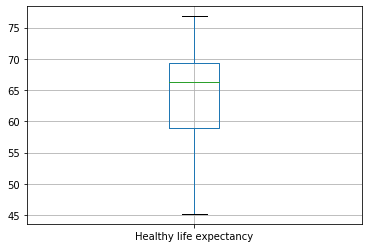

In [8]:
bp = df.boxplot(column = 'Healthy life expectancy') 
#clearly there are no outliers in the diagram below

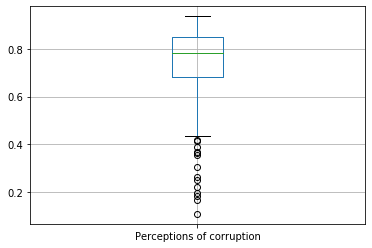

In [9]:
bp = df.boxplot(column = 'Perceptions of corruption')
#we can see lots of outliers in this boxplot

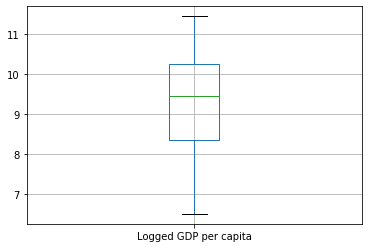

In [4]:
bp = df.boxplot(column = 'Logged GDP per capita')
#No outliers in this plot 

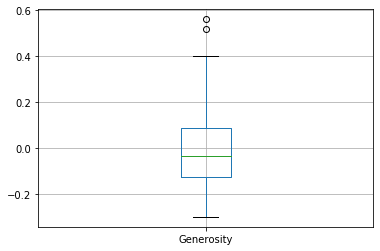

In [5]:
bp = df.boxplot(column = 'Generosity')
#Two outliers in this plot

It is important that we handle outliers correctly. We must firstly apply outliers to our entire data to make sure we retrieve accurate results throughout this experiment.

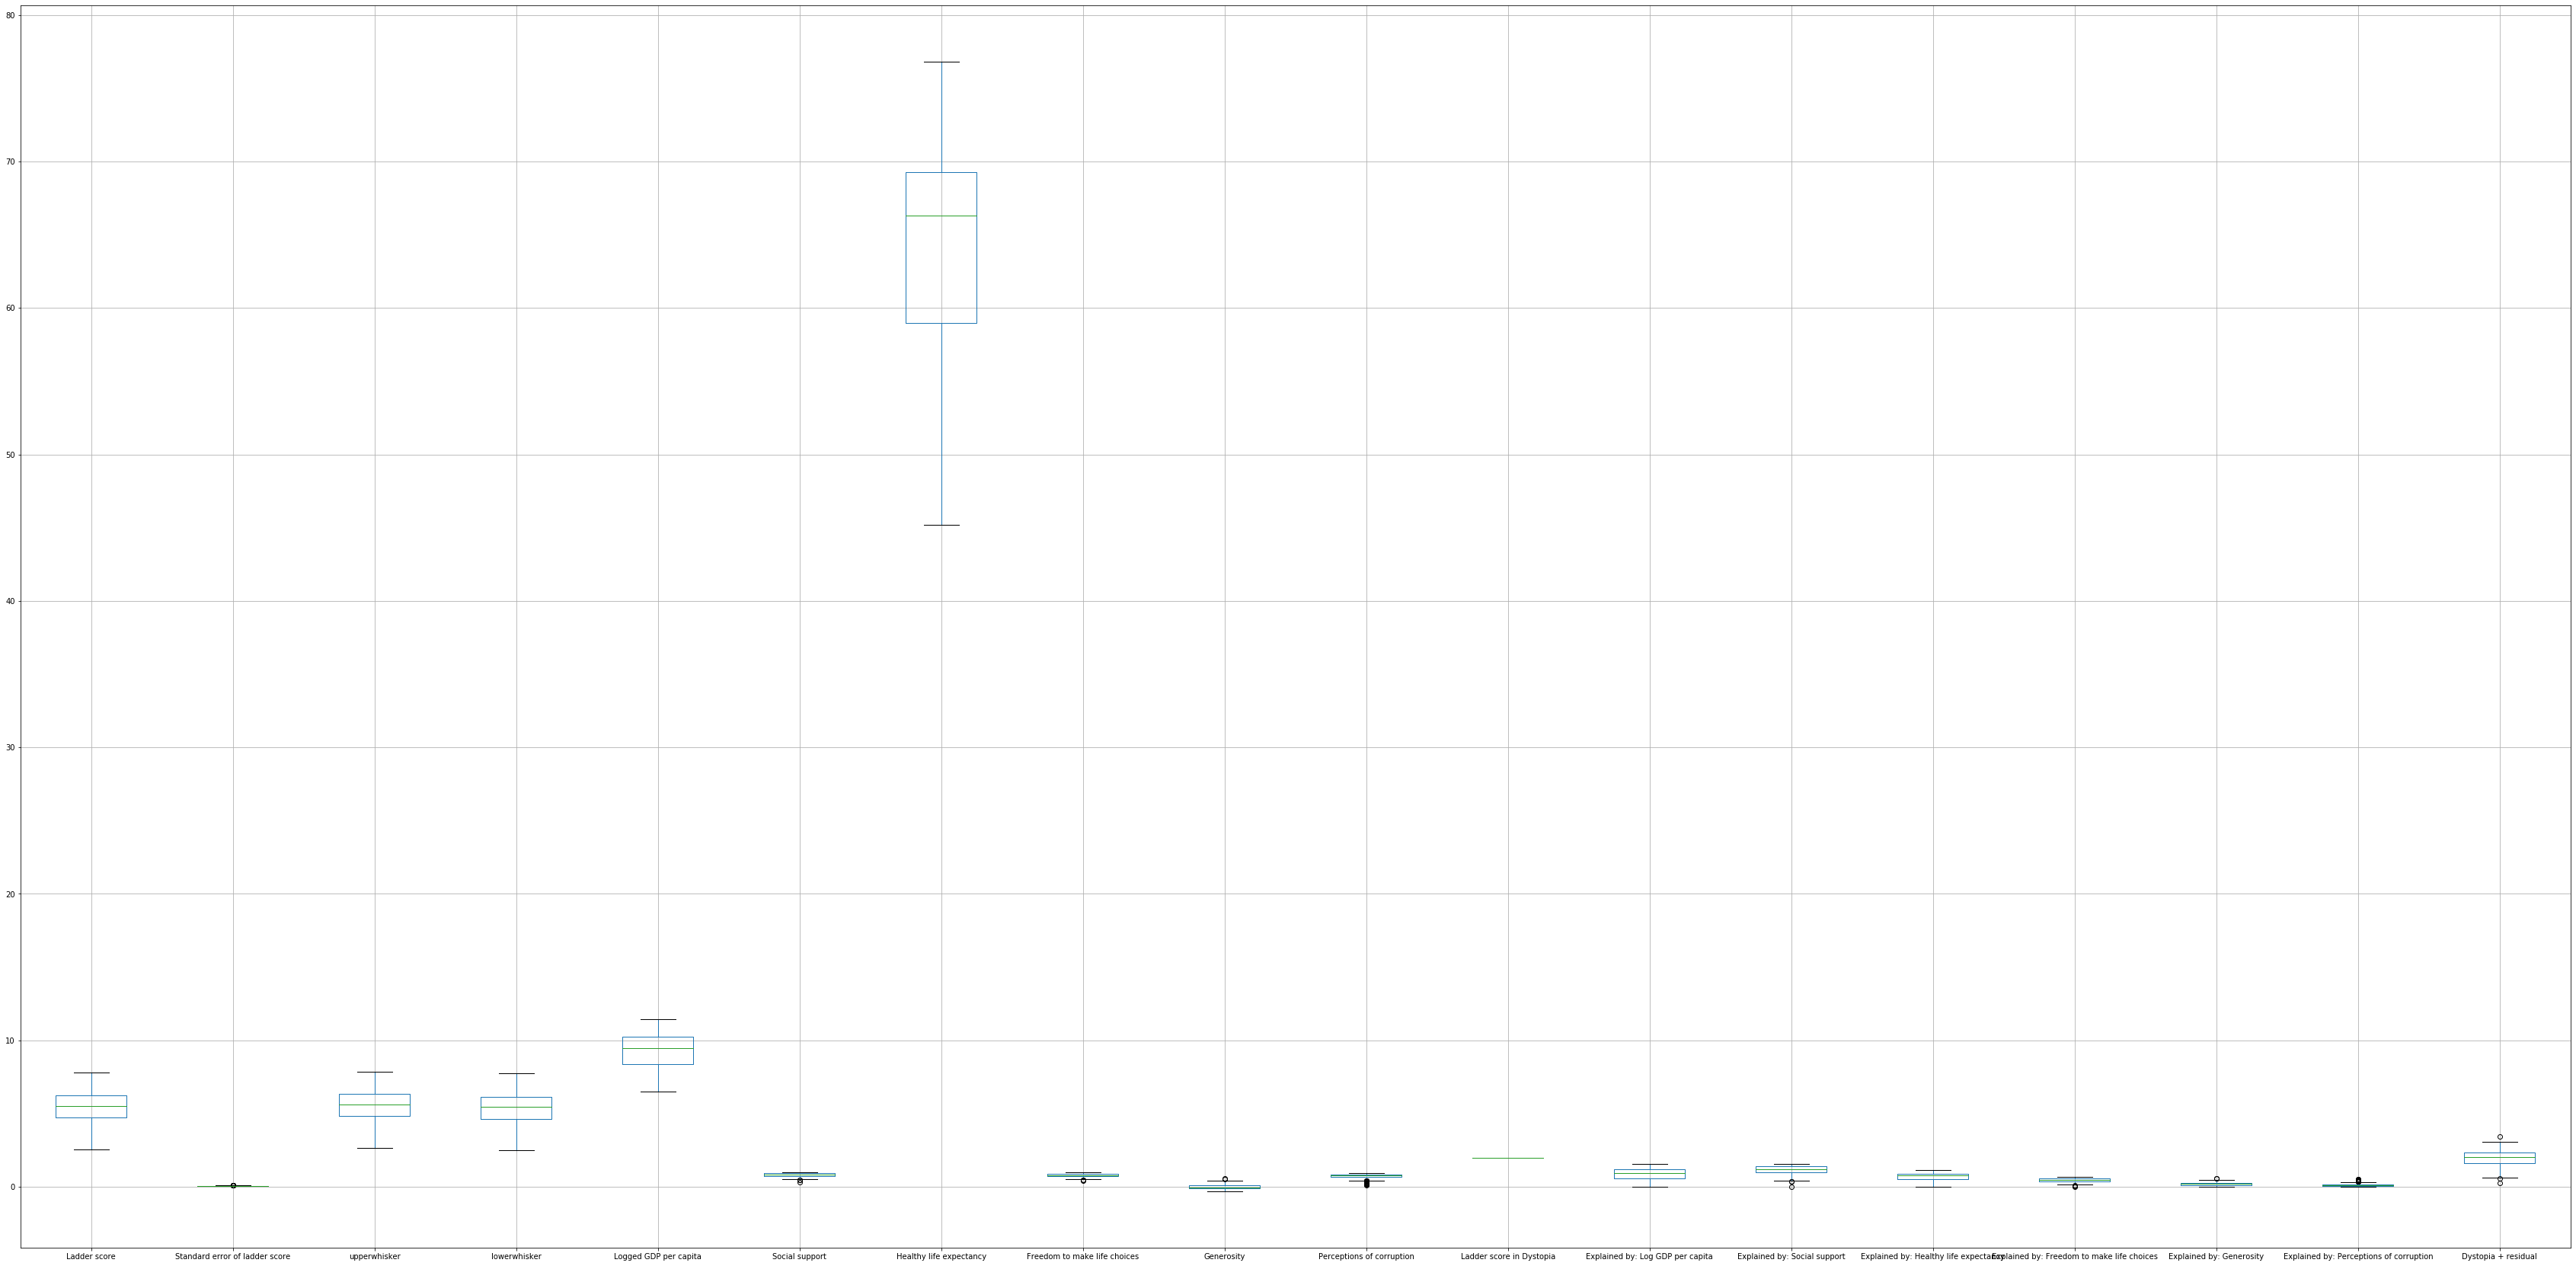

In [43]:
import matplotlib as plt
%matplotlib inline
_, bp = pd.DataFrame.boxplot(df,return_type='both', figsize= (60,30))

In [45]:
outliers = [flier.get_ydata() for flier in bp['fliers']]
outliers

[array([], dtype=float64),
 array([0.11444846, 0.12059043, 0.10899823, 0.10712238, 0.101463  ,
        0.11518295, 0.1076104 ]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([0.46867114, 0.31945986, 0.47036695]),
 array([], dtype=float64),
 array([0.46661091, 0.45131362, 0.39657301]),
 array([0.5195865, 0.560664 ]),
 array([0.19544458, 0.16848946, 0.30372843, 0.26321819, 0.36471713,
        0.25088018, 0.22113885, 0.3670843 , 0.39084336, 0.41516912,
        0.35718417, 0.10978419, 0.42060721, 0.18354118]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([0.35242844, 0.        , 0.35643384]),
 array([], dtype=float64),
 array([0.0839438 , 0.06560925, 0.        ]),
 array([0.54264653, 0.56981373]),
 array([0.47785726, 0.49526033, 0.4079459 , 0.43410057, 0.36856976,
        0.44206637, 0.46126828, 0.36704147, 0.35170186, 0.33599642,
        0.37343326, 0.53316224, 0.33248544, 0.48554248]),
 array([0.25724053, 0.54844499, 3.44080973])

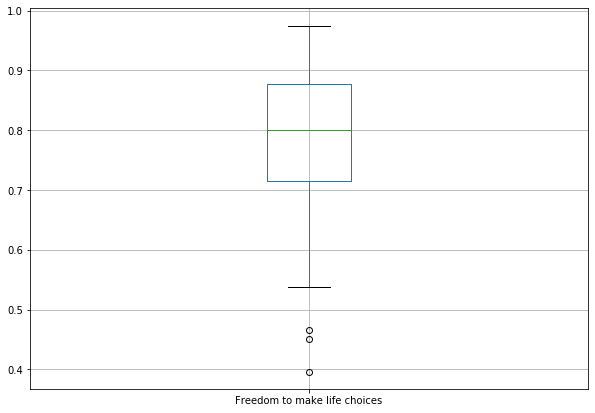

In [54]:
bp = df.boxplot(column = 'Freedom to make life choices', figsize=(10,7)) #only 3 outliers

## Step 3: Perform exploratory analysis and ask questions

Firstly, I am going to explore distributions of numeric columns of my dataframe. 

Histograms are an excellent statistical way of displaying discrete or continuous data. Below, I configured three histograms each for the variables 'Healthy life expectancy', 'Generosity', and 'Social support.'

(array([ 1.,  0.,  3.,  4., 10., 14., 15., 35., 34., 37.]),
 array([0.31945986, 0.38498083, 0.4505018 , 0.51602277, 0.58154374,
        0.64706472, 0.71258569, 0.77810666, 0.84362763, 0.9091486 ,
        0.97466958]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

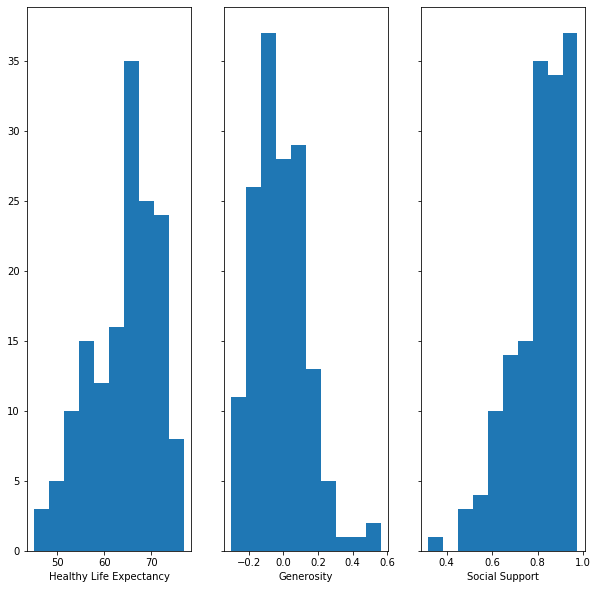

In [13]:
fig = plt.figure()
fig, (ax0,ax1,ax2)=plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(10,10))
ax0.set_xlabel("Healthy Life Expectancy")
ax1.set_xlabel("Generosity")
ax2.set_xlabel('Social Support')
ax0.hist(df['Healthy life expectancy'])
ax1.hist(df['Generosity'])
ax2.hist(df['Social support'])

We can see that Healthy life expectancy and social support are negatively skewed whilst generosity is positively skewed. We will see more plots like this when we use the Python library SeaBorn later on. 

Here, I am going to investigate the healthy life expectancy of the top ten countries in the data and the same for the bottom ten countries in the list. We expect there to be a difference between these numbers.  

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
5,Netherlands,Western Europe,7.4489,0.027792,7.503372,7.394428,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117
6,Sweden,Western Europe,7.3535,0.036234,7.424519,7.282481,10.758794,0.926311,72.600769,0.939144,0.111615,0.250880,1.972317,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066,2.246299
7,New Zealand,North America and ANZ,7.2996,0.039465,7.376953,7.222248,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139,1.972317,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268,2.128108
8,Austria,Western Europe,7.2942,0.033365,7.359596,7.228804,10.742824,0.928046,73.002502,0.899989,0.085429,0.499955,1.972317,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256,2.398446
9,Luxembourg,Western Europe,7.2375,0.030852,7.297970,7.177031,11.450681,0.906912,72.599998,0.905636,-0.004621,0.367084,1.972317,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041,2.153700


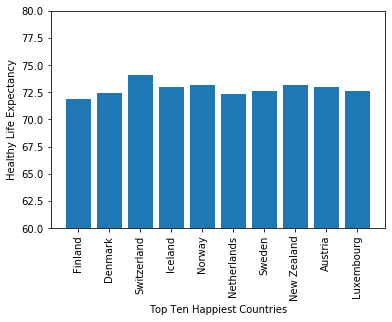

In [5]:
df1 = df[:10]   #Top Ten countries
countries = df1['Country name']
xs = range(len(countries)) #number of countries in our new dataframe 
plt.bar(xs,df1['Healthy life expectancy']) # what we want to measure our bars against
plt.xticks(np.arange(0,10,step=0.1)) #step size on x-axis
plt.xticks(xs,countries,rotation = 'vertical')
plt.ylim(60,80)
plt.ylabel('Healthy Life Expectancy')
plt.xlabel('Top Ten Happiest Countries')
df1

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
143,India,South Asia,3.5733,0.027702,3.627596,3.519003,8.849824,0.592201,60.215187,0.881445,0.057552,0.772043,1.972317,0.730576,0.644199,0.540570,0.581142,0.237072,0.105588,0.734131
144,Malawi,Sub-Saharan Africa,3.5380,0.070261,3.675711,3.400290,7.062226,0.544007,57.592888,0.803223,0.021433,0.731701,1.972317,0.176535,0.530368,0.446163,0.487390,0.213185,0.131634,1.552718
145,Yemen,Middle East and North Africa,3.5274,0.054158,3.633550,3.421250,7.759683,0.817981,56.727283,0.599920,-0.157735,0.800288,1.972317,0.392702,1.177477,0.415000,0.243721,0.094689,0.087352,1.116473
146,Botswana,Sub-Saharan Africa,3.4789,0.060543,3.597564,3.360236,9.711204,0.779122,58.924454,0.821328,-0.250394,0.777931,1.972317,0.997549,1.085695,0.494102,0.509089,0.033407,0.101786,0.257241
147,Tanzania,Sub-Saharan Africa,3.4762,0.063210,3.600091,3.352309,7.967665,0.688933,57.496075,0.821540,0.109669,0.619799,1.972317,0.457163,0.872675,0.442678,0.509343,0.271541,0.203881,0.718963
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751
152,Afghanistan,South Asia,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236


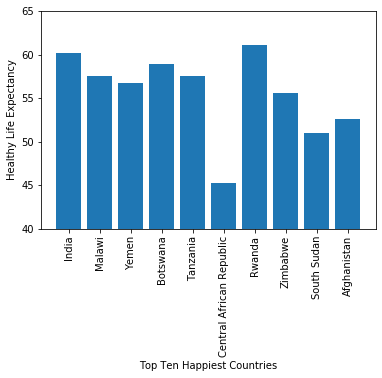

In [8]:
df2 = df.tail(10) #bottom ten countries
countries = df2['Country name']
xs = range(len(countries))
plt.bar(xs,df2['Healthy life expectancy'])
plt.xticks(np.arange(0,10,step=0.1))
plt.xticks(xs,countries,rotation='vertical')
plt.ylabel('Healthy Life Expectancy')
plt.xlabel('Top Ten Happiest Countries')
plt.ylim(40,65)
df2

From the first bar chart, we can obviously see that Switzerland has the highest healthy life expectancy nearing 75 and Finland has the lowest. From the second bar chart, Central African Republic has the lowest healthy life expectancy out of the whole data set and it is considerably lower than the other 9 countries in the bottom 10 happiest countries. Rwanda has the highest healthy life expectancy out of the bottom 10 countries in the happiness index of 2020.

Doing these bar charts led me to ask more question about my data set. Let's compare the top/bottom 10 countries social support using bar charts.

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
5,Netherlands,Western Europe,7.4489,0.027792,7.503372,7.394428,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117
6,Sweden,Western Europe,7.3535,0.036234,7.424519,7.282481,10.758794,0.926311,72.600769,0.939144,0.111615,0.250880,1.972317,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066,2.246299
7,New Zealand,North America and ANZ,7.2996,0.039465,7.376953,7.222248,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139,1.972317,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268,2.128108
8,Austria,Western Europe,7.2942,0.033365,7.359596,7.228804,10.742824,0.928046,73.002502,0.899989,0.085429,0.499955,1.972317,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256,2.398446
9,Luxembourg,Western Europe,7.2375,0.030852,7.297970,7.177031,11.450681,0.906912,72.599998,0.905636,-0.004621,0.367084,1.972317,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041,2.153700


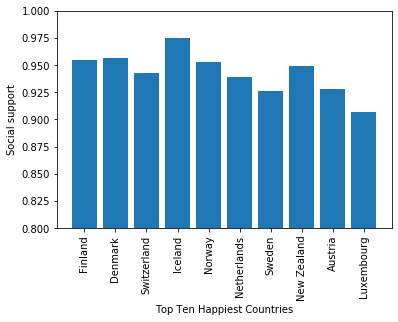

In [26]:
df2 = df.head(10) #bottom ten countries
countries = df2['Country name']
xs = range(len(countries))
plt.bar(xs,df2['Social support'])
plt.xticks(np.arange(0,10,step=0.1))
plt.xticks(xs,countries,rotation='vertical')
plt.ylabel('Social support')
plt.xlabel('Top Ten Happiest Countries')
plt.ylim(0.8,1)
df2

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
143,India,South Asia,3.5733,0.027702,3.627596,3.519003,8.849824,0.592201,60.215187,0.881445,0.057552,0.772043,1.972317,0.730576,0.644199,0.540570,0.581142,0.237072,0.105588,0.734131
144,Malawi,Sub-Saharan Africa,3.5380,0.070261,3.675711,3.400290,7.062226,0.544007,57.592888,0.803223,0.021433,0.731701,1.972317,0.176535,0.530368,0.446163,0.487390,0.213185,0.131634,1.552718
145,Yemen,Middle East and North Africa,3.5274,0.054158,3.633550,3.421250,7.759683,0.817981,56.727283,0.599920,-0.157735,0.800288,1.972317,0.392702,1.177477,0.415000,0.243721,0.094689,0.087352,1.116473
146,Botswana,Sub-Saharan Africa,3.4789,0.060543,3.597564,3.360236,9.711204,0.779122,58.924454,0.821328,-0.250394,0.777931,1.972317,0.997549,1.085695,0.494102,0.509089,0.033407,0.101786,0.257241
147,Tanzania,Sub-Saharan Africa,3.4762,0.063210,3.600091,3.352309,7.967665,0.688933,57.496075,0.821540,0.109669,0.619799,1.972317,0.457163,0.872675,0.442678,0.509343,0.271541,0.203881,0.718963
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751
152,Afghanistan,South Asia,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236


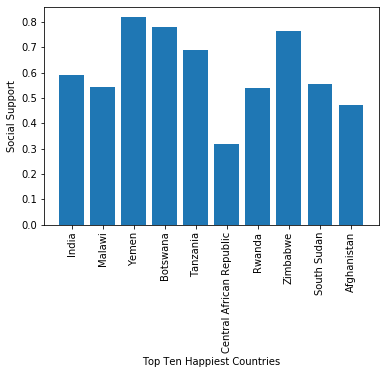

In [27]:
df3 = df.tail(10) #bottom ten countries
countries = df3['Country name']
xs = range(len(countries))
plt.bar(xs,df3['Social support'])
plt.xticks(np.arange(0,10,step=0.1))
plt.xticks(xs,countries,rotation='vertical')
plt.ylabel('Social Support')
plt.xlabel('Top Ten Happiest Countries')
df3

Luxembourg has the lowest amount of social support out of the top ten and Iceland has the highest. Central African Republic scored bottom again, with Social support being around 0.3. Yemen seemed to have the highest amount of social support out of the bottom ten countries at around 0.8.

Below, I wanted to see how much each country in the top ten and bottom ten happiest countries have share of Social Support and Logged GDP per capita to see if there are significant differences between the countries.

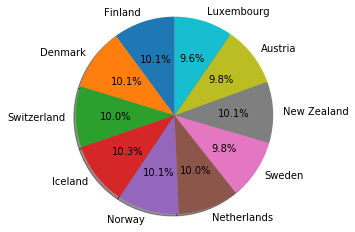

In [64]:
import matplotlib.pyplot as plt
df1 = df.head(10)
labels = df1['Country name']
sizes = df1['Social support']
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True,startangle = 90)
plt.axis('equal')
plt.show()

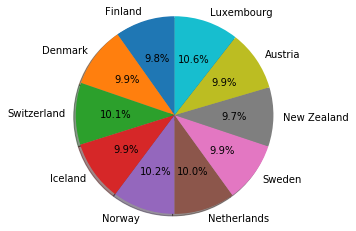

In [65]:
import matplotlib.pyplot as plt
df1 = df.head(10)
labels = df1['Country name']
sizes = df1['Logged GDP per capita']
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True,startangle = 90)
plt.axis('equal')
plt.show()

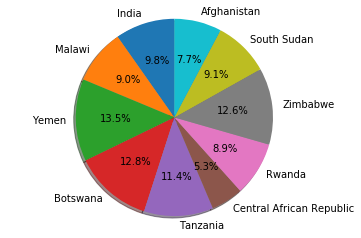

In [66]:
import matplotlib.pyplot as plt
df1 = df.tail(10)
labels = df1['Country name']
sizes = df1['Social support']
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True,startangle = 90)
plt.axis('equal')
plt.show()

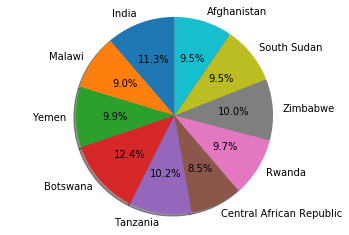

In [68]:
import matplotlib.pyplot as plt
df1 = df.tail(10)
labels = df1['Country name']
sizes = df1['Logged GDP per capita']
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True,startangle = 90)
plt.axis('equal')
plt.show()

From analysing the Pie Charts above, we can see that in the Top Ten countries, there seems to be a very even share of both variables across all countries. Most contries are within 1% of each other in these charts. However, in the bottom 10 countries there seems to be a bigger difference. For example, looking at the bottom 10 pie chart for Social support Central African Republic has less than half of the social support that Yemen has.

I want to plot a scatter graph to show how variables work together. Let's look at ladder position and some variables to get an understanding of this.

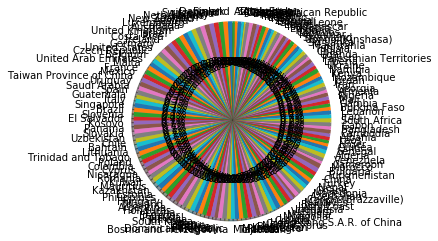

In this part of the data exploration, I am going to use the Python library Seaborn to show some more advanced graphs than that offered in matplotlib. Below, a series of distribution plots and violin plots which will show us the distribution of the columns used. From this, we will be able to see a pattern between each plot and be able to determine the skewness of the plot. When a plot is positively skewed it quite often means that the mean is greater than the median and for a negatively skewed distribution the converse is true.

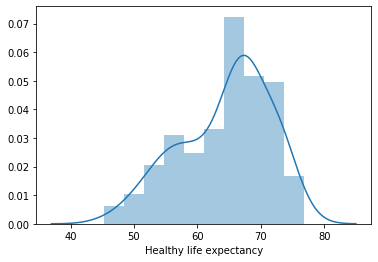

In [14]:
df=pd.read_csv('2020.csv')
sns.distplot(df['Healthy life expectancy'], bins = 10) 

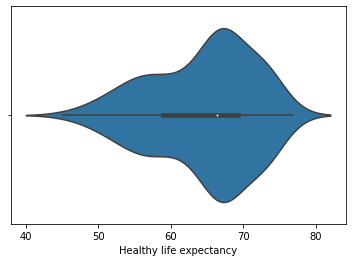

In [46]:
sns.violinplot(df['Healthy life expectancy'],bins=10)

From the plots above, we can see that the distribution of 'Healthy life expectancy' is negatively skewed. 

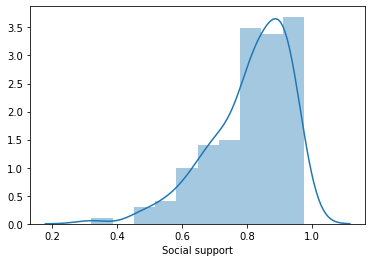

In [30]:
sns.distplot(df['Social support'], bins=10)

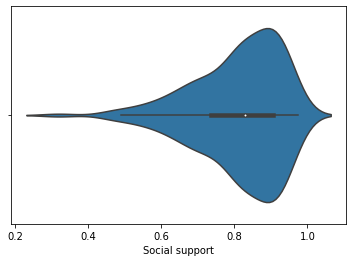

In [45]:
sns.violinplot(df['Social support'],bins=10)

From the plots above, we can see that the distribution of 'Social support' is negatively skewed. 

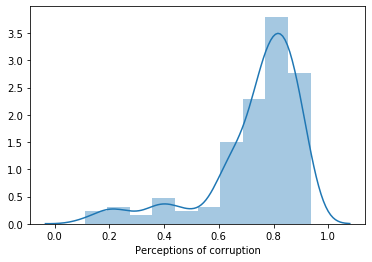

In [35]:
sns.distplot(df['Perceptions of corruption'],bins=10)

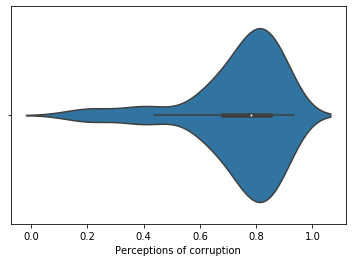

In [44]:
sns.violinplot(df['Perceptions of corruption'],bins=10)

From the plots above, we can see that the distribution of 'Perceptions of corruption' is negatively skewed. 

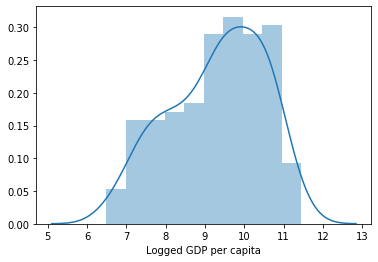

In [36]:
sns.distplot(df['Logged GDP per capita'],bins=10)

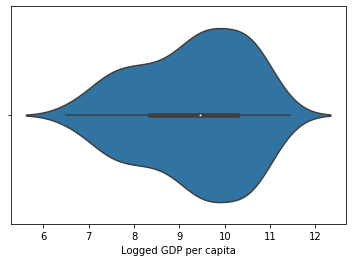

In [41]:
sns.violinplot(df['Logged GDP per capita'])

From the plots above, we can see that the distribution of 'Logged GDP per capita' is slightly negatively skewed. 

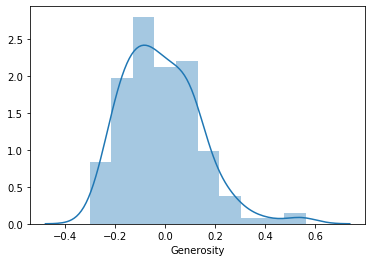

In [39]:
sns.distplot(df['Generosity'],bins=10)

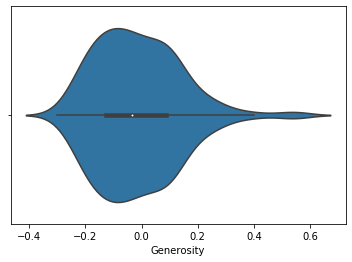

In [40]:
sns.violinplot(df['Generosity'])

From the plots above, we can see that the distribution of 'Generosity' is positively skewed. 

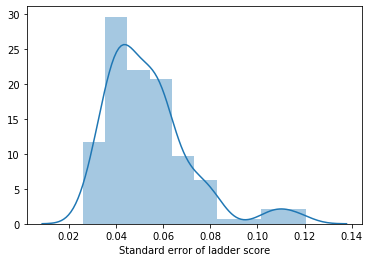

In [47]:
sns.distplot(df['Standard error of ladder score'],bins=10)

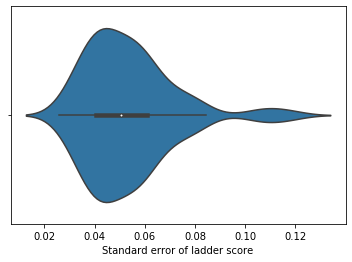

In [48]:
sns.violinplot(df['Standard error of ladder score'],bins=10)

From the plots above, we can see that the distribution of 'Standard error of ladder score' is positively skewed.

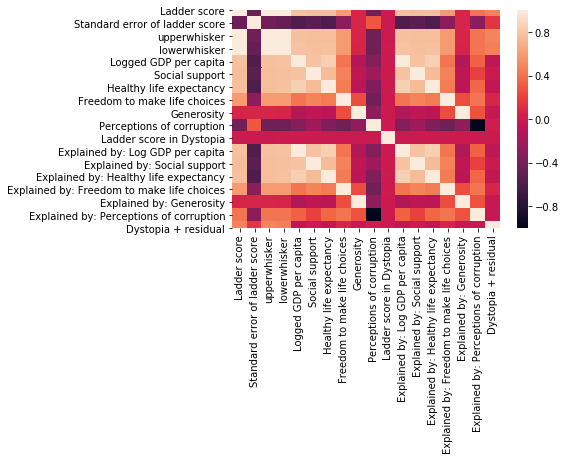

In [30]:
sns.heatmap(df.corr())

The heatmap above shows out of all the different variables the correlation between them based on the scale provided. For example, the darker the colour the more negatively correlated that variable is to another variable. This visual is good for looking at hypothesis to test when trying to understand correlation between certain trends.

#### Question 1: Is Generosity and Healthy life expectancy correlated for countries in sub-saharan African?

This requires us to plot a line of reggression between these two variables within sub-saharan African countries.

-0.5246061484479272


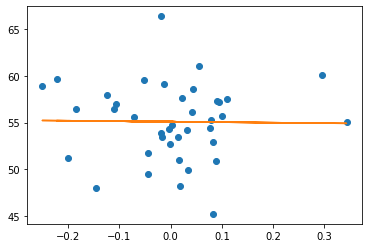

In [12]:
condition2 = df['Regional indicator']=='Sub-Saharan Africa'
ssafrica_hle = df.loc[condition2,:]
x_1 = df.loc[condition2,:]
x = x_1['Generosity']
y = x_1['Healthy life expectancy']
plt.plot(x,y,'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
print(m)

We can see that m = -0.525 (3.d.p) this implies a negative gradient. So there is negative correlation between Generosity and Healthy life expectancy in sub-saharan africa. 

#### Question 2: The mean Healthy life expectancy in Western Europe is better than in North America, Australia and New Zealand?

We want to test this hypothesis by using a suitable test. We take our significan level to be set at 0.05 each tail. We want to locate the data that we will be using to find an average healthy life expectancy.  

In [9]:
condition1 = df['Regional indicator'] == 'Western Europe'
western_hle = df.loc[condition1,:]
df.loc[condition1,:]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
5,Netherlands,Western Europe,7.4489,0.027792,7.503372,7.394428,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117
6,Sweden,Western Europe,7.3535,0.036234,7.424519,7.282481,10.758794,0.926311,72.600769,0.939144,0.111615,0.250880,1.972317,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066,2.246299
8,Austria,Western Europe,7.2942,0.033365,7.359596,7.228804,10.742824,0.928046,73.002502,0.899989,0.085429,0.499955,1.972317,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256,2.398446
9,Luxembourg,Western Europe,7.2375,0.030852,7.297970,7.177031,11.450681,0.906912,72.599998,0.905636,-0.004621,0.367084,1.972317,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041,2.153700
12,United Kingdom,Western Europe,7.1645,0.037162,7.237338,7.091663,10.600135,0.936683,72.301605,0.834744,0.263732,0.435916,1.972317,1.273061,1.457845,0.975700,0.525169,0.373433,0.322602,2.236722


In [10]:
condition2 = df['Regional indicator']== 'North America and ANZ'
northa_hle = df.loc[condition2,:]
df.loc[condition2,:]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
7,New Zealand,North America and ANZ,7.2996,0.039465,7.376953,7.222248,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139,1.972317,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268,2.128108
10,Canada,North America and ANZ,7.2321,0.040405,7.311295,7.152905,10.692369,0.927177,73.601601,0.933913,0.124771,0.390843,1.972317,1.301648,1.435392,1.022502,0.644028,0.281529,0.351702,2.195269
11,Australia,North America and ANZ,7.2228,0.041841,7.304808,7.140791,10.720596,0.944855,73.604538,0.915432,0.190460,0.415169,1.972317,1.310396,1.477146,1.022608,0.621877,0.324974,0.335996,2.129804
17,United States,North America and ANZ,6.9396,0.047316,7.032340,6.846860,10.925769,0.914219,68.299500,0.842620,0.149892,0.699715,1.972317,1.373987,1.404787,0.831618,0.534608,0.298143,0.152285,2.344125


So we have now create two new datasets that just contain the information for Western Europe and North America We need to use these new dataframes to conduct our hypothesis test.

Let $\mu_1=$ Mean Healthy Life Expectancy for Western Europe.

$\mu_2=$Mean Healthy Life Expectancy for North America. 

Then we have that:

* $H_0:~\mu_1-\mu_2=0$
* $H_1:`\mu_1-\mu_2>0$

In [11]:
import scipy as stats
we = western_hle['Healthy life expectancy']
na = northa_hle['Healthy life expectancy']
stats.stats.ttest_ind(we,na,equal_var=False)

Ttest_indResult(statistic=0.525579377651983, pvalue=0.634512907185723)

Since p vaule is $> 0.05$ we cannot reject the null hypothesis. There is insufficient statistical evidence to suggest that the mean life expectancy in Western Europe is better than that of North America, Australia and New Zealand.

This leads us to ask other questions about our data and perform more hypothesis tests.

#### Question 3: Predicting which region a country is from based on logged GDP per capita. Which machine learning algorithm does a better job?

In this section, I will be comparing two Machine learning algorithms, Logistic Regression and the Perceptron algorithm, to see which is better at predicting which region a country is from based on logged GDP per capita. 

Firstly, I want to create a new and easier dataframe to work with using our original dataframe, only including the two variables, region and logged GDP per capita.  

In [16]:
df_ml = df[['Country name','Regional indicator','Logged GDP per capita']]
df_ml.head(10)

,Country name,Regional indicator,Logged GDP per capita
0,Finland,Western Europe,10.639267
1,Denmark,Western Europe,10.774001
2,Switzerland,Western Europe,10.979933
3,Iceland,Western Europe,10.772559
4,Norway,Western Europe,11.087804
5,Netherlands,Western Europe,10.812712
6,Sweden,Western Europe,10.758794
7,New Zealand,North America and ANZ,10.500943
8,Austria,Western Europe,10.742824
9,Luxembourg,Western Europe,11.450681


In [17]:
df_ml.describe()

,Logged GDP per capita
count,153.000000
mean,9.295706
std,1.201588
min,6.492642
25%,8.350645
50%,9.456313
75%,10.265124
max,11.450681


In [18]:
# We need to now to assign variables to our data
x = np.array(df_ml['Logged GDP per capita'].values)
y = np.array(df_ml['Regional indicator'].values)

I have now created a new dataframe which has the columns of interest as you can see above! Further, I have used the built-in describe function to summarise the data using different metrics. Assigned an x,y variable to my data too. Now I need to load my machine learning algorithms from scikit-learn to conduct the analysis. 

In [19]:
#Firstly, we try to predict the freedom to make life choices based on logged gdp per capita using logistic regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score
from sklearn.model_selection import train_test_split

model1 = LogisticRegression(fit_intercept=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [20]:
model1.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred_LR = model1.predict(x_test.reshape(-1,1))
y_pred_LR

array(['Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Latin America and Caribbean', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'Latin America and Caribbean',
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Latin America and Caribbean', 'Latin America and Caribbean',
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa',
       '

In [22]:
print('The accuracy of Logistic Rogression at predicting a countries region based on logged GDP per capita is: ' 
      ,model1.score(x_test.reshape(-1,1),y_test.reshape(-1,1)))

The accuracy of Logistic Rogression at predicting a countries region based on logged GDP per capita is:  0.2391304347826087


In [23]:
confusion = metrics.confusion_matrix(y_test.reshape(-1,1),model1.predict(x_test.reshape(-1,1)))
class_report = metrics.classification_report(y_test.reshape(-1,1),model1.predict(x_test.reshape(-1,1)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
print(confusion) #confusion matrix 
print(class_report)

[[ 0  0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  5  0]
 [ 0  0  1  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  2  0]
 [ 0  0  1  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0 11  0]
 [ 0  0  3  0  0  0  0  7  0]]
                                    precision    recall  f1-score   support

        Central and Eastern Europe       0.00      0.00      0.00         6
Commonwealth of Independent States       0.00      0.00      0.00         3
       Latin America and Caribbean       0.00      0.00      0.00         5
      Middle East and North Africa       0.00      0.00      0.00         4
             North America and ANZ       0.00      0.00      0.00         1
                        South Asia       0.00      0.00      0.00         2
                    Southeast Asia       0.00      0.00      0.00         4
                Sub-Saharan Africa       0.27      1.00      0.42        11
                    Western Europe       0.0

In [25]:
from sklearn.linear_model import Perceptron
model2 = Perceptron()

model2.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
y_pred_LR = model2.predict(x_test.reshape(-1,1))
y_pred_LR

array(['Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Co

In [27]:
print('The accuracy of the Perceptron algorithm at predicting a countries region based on logged GDP per capita is: ' 
      ,model2.score(x_test.reshape(-1,1),y_test.reshape(-1,1)))

The accuracy of the Perceptron algorithm at predicting a countries region based on logged GDP per capita is:  0.06521739130434782


In [28]:
confusion = metrics.confusion_matrix(y_test.reshape(-1,1),model1.predict(x_test.reshape(-1,1)))
class_report = metrics.classification_report(y_test.reshape(-1,1),model1.predict(x_test.reshape(-1,1)))

print(confusion)
print(class_report)

[[ 0  0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  5  0]
 [ 0  0  1  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  2  0]
 [ 0  0  1  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0 11  0]
 [ 0  0  3  0  0  0  0  7  0]]
                                    precision    recall  f1-score   support

        Central and Eastern Europe       0.00      0.00      0.00         6
Commonwealth of Independent States       0.00      0.00      0.00         3
       Latin America and Caribbean       0.00      0.00      0.00         5
      Middle East and North Africa       0.00      0.00      0.00         4
             North America and ANZ       0.00      0.00      0.00         1
                        South Asia       0.00      0.00      0.00         2
                    Southeast Asia       0.00      0.00      0.00         4
                Sub-Saharan Africa       0.27      1.00      0.42        11
                    Western Europe       0.0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


It is clear that both machine learning algorithms do a very poor job of predicting a countries region based on logged GDP per capita. Perceptron had a score of 6.52% whereas Logistic Regression had a score 24.0% (3 decimal places). Hence, Logistic Regression is better at predicting a countries region based on logged GDP per capita. 

#### Question 4: How well does Linear Regression predict the freedom to make life choices of a country based on perceptions of corruption

To answer this question, we look at the linear regression model and see how accurate it is a predicting the freedom to make life choices based on perceptions of corruption.

In [29]:
df_lr = df[['Country name','Freedom to make life choices','Perceptions of corruption']]
df_lr.head(10)

,Country name,Freedom to make life choices,Perceptions of corruption
0,Finland,0.949172,0.195445
1,Denmark,0.951444,0.168489
2,Switzerland,0.921337,0.303728
3,Iceland,0.948892,0.711710
4,Norway,0.955750,0.263218
5,Netherlands,0.908548,0.364717
6,Sweden,0.939144,0.250880
7,New Zealand,0.936217,0.221139
8,Austria,0.899989,0.499955
9,Luxembourg,0.905636,0.367084


Above, we have created a new data frame with only the relevant columns to make the manipulation of our data a little easier. Below, I have imported the Linear Regression function from SciKit Learn which is the AI/ML library in Python. Further, I want to plot the Linear Regression to see the correlation, this is a good indicator as to whether it is a good model to use for our data. 

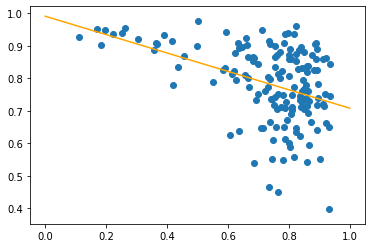

In [33]:
from sklearn.linear_model import LinearRegression

x = df_lr['Perceptions of corruption'].values
y=df_lr['Freedom to make life choices'].values

model = LinearRegression(fit_intercept = True)

model.fit(x.reshape(-1,1),y.reshape(-1,1))

xfit = np.linspace(0,1,10)
yfit = model.predict(xfit.reshape(10,1))

plt.scatter(x,y)
plt.plot(xfit,yfit,color='orange');

In [34]:
print("Coefficients: ",model.coef_[0], '\nintercept: ',model.intercept_)

Coefficients:  [-0.28250591] 
intercept:  [0.99047097]


In [35]:
model.score(x.reshape(-1,1),y.reshape(-1,1))

0.17652140497800195

This indicates that there the linear regression model is 17% effective at predicting freedom to make life choices of a country based on perceptions of corruption. This is quite a low score, when looking at machine learning models we look for efficiency to be as optimal as possible.

#### Question 5: Is there correlation between Healthy life expectancy in Central and Eastern Europe and Logged GDP per capita.

We look at the line of regression when plotting these two parameters in order to see if there is correlation between these two metrics. 

0.13063863446548624


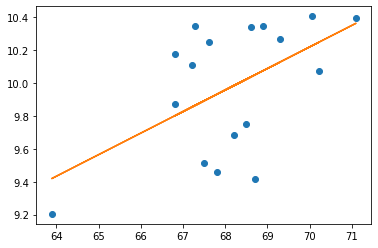

In [32]:
condition = df['Regional indicator']=='Central and Eastern Europe'
na_hle = df.loc[condition,:]
x_1 = df.loc[condition,:]
x = x_1['Healthy life expectancy']
y = x_1['Logged GDP per capita']
plt.plot(x,y,'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
print(m)

Clearly from the graph above, there is a slightly positive correlation between healthy life expectancy and logged gdp per capita in central and eastern europe. 

## Step 4: Conclusion

The analysis that I have conducted has taught me a variety of things about the happiness index of the world. There seems to be many trends in behaviours between regions. It seems that Scandinavian countries which are a subcategory of European countries, are the happiest countries in the world. Sub-saharan African countries tend to be the least happiness due to the low life expectancy and having the least freedom to make life choices.

In my research, I was very shocked to find the the Central African Republic scored lowest in social support and healthy life expectancy. Further, the distribution of each of the variables was very interesting. The majority of the variables had a negative skewness however Generosity had a positive skew meaning the mean is higher than the median. 

The questions I asked myself proved to be very interesting. The negative correlation between Generosity and Healthy life expectancy in sub-saharan Africa was the first question that I answered. Moreover, it was interesting to see that there was insufficient evidence to reject the claim that 'Western Europe and North America, Australia and New Zealand all have the same mean life expectancy.' It was disappointing to see that the machine learning algorithms weren't very good at predicting a countries region based on logged GDP per capita. This is something I intend to improving in future work. Furthermore, the slightliy positive correlation between healthy life expectancy and logged gdp per capita came as a shock since I thought there would have been a stronger positive correlation between these two events.

In future work, I intend to dive into using SeaBorn Python library more as the visual displays of these graphs are clearer and more informative than the graphs outputted by matplotlib. Furthermore, I am fascinated about implmenting different types of hypothesis tests to different data sets and seeing further trends in behaviour. On Kaggle, there seemed to be many Happiness Indexes from various different years, it would be interesting to do a Data Analytics project to compare the Happiness indexes from year to year. I think it would be something that I would be fascinated by.